In [ ]:
from google.colab import drive



In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f = open('/content/drive/MyDrive/web-Stanford.txt')
data=f.readlines()
#print(f.readlines())

In [ ]:
ndata=data[4:len(data)]

In [ ]:
ndata

['1\t6548\n',
 '1\t15409\n',
 '6548\t57031\n',
 '15409\t13102\n',
 '2\t17794\n',
 '2\t25202\n',
 '2\t53625\n',
 '2\t54582\n',
 '2\t64930\n',
 '2\t73764\n',
 '2\t84477\n',
 '2\t98628\n',
 '2\t100193\n',
 '2\t102355\n',
 '2\t105318\n',
 '2\t105730\n',
 '2\t115926\n',
 '2\t140864\n',
 '2\t163550\n',
 '2\t164599\n',
 '2\t175799\n',
 '2\t178642\n',
 '2\t181714\n',
 '2\t190453\n',
 '2\t204189\n',
 '2\t204604\n',
 '2\t210870\n',
 '2\t213966\n',
 '2\t225119\n',
 '2\t241596\n',
 '2\t243294\n',
 '2\t246897\n',
 '2\t251658\n',
 '2\t252915\n',
 '2\t280935\n',
 '252915\t2\n',
 '246897\t2\n',
 '246897\t78056\n',
 '251658\t2\n',
 '280935\t2\n',
 '213966\t2\n',
 '213966\t47149\n',
 '243294\t2\n',
 '225119\t2\n',
 '241596\t2\n',
 '178642\t2\n',
 '210870\t2\n',
 '204189\t2\n',
 '190453\t2\n',
 '204604\t2\n',
 '181714\t2\n',
 '164599\t2\n',
 '175799\t2\n',
 '163550\t2\n',
 '140864\t2\n',
 '115926\t2\n',
 '73764\t2\n',
 '105730\t2\n',
 '105730\t18816\n',
 '105730\t182456\n',
 '98628\t2\n',
 '84477\t2\n',


In [ ]:
!pip3 install networkx

In [ ]:
import networkx as nx
G=nx.barabasi_albert_graph(3,2)
G

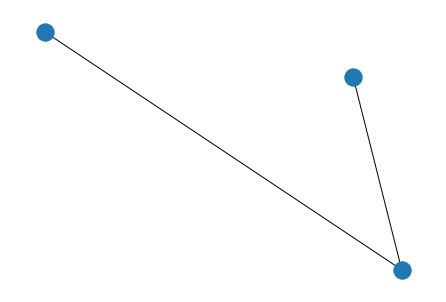

In [ ]:
nx.draw_random(G)

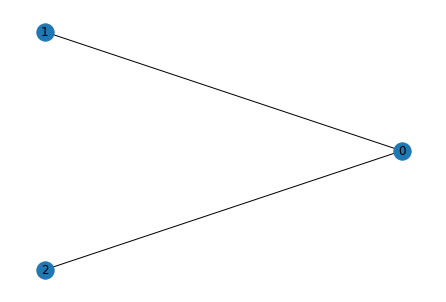

In [ ]:
nx.draw_circular(G,with_labels=True)

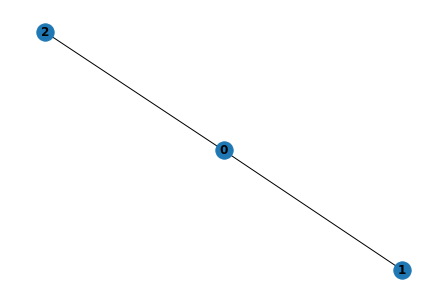

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
print("Nodes:",list(G.nodes))
print("Edges:",list(G.edges))

Nodes: [0, 1, 2]
Edges: [(0, 1), (0, 2)]


False


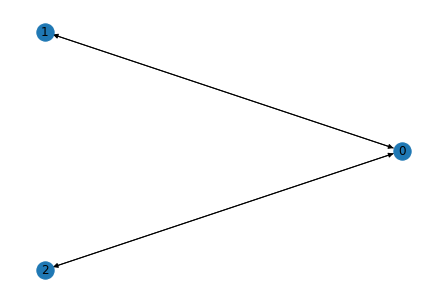

In [ ]:
print(G.is_directed())
dg=G.to_directed()
nx.draw_circular(dg,with_labels=True)

Nodes: [1, 2]
Edges: [(1, 2)]
False


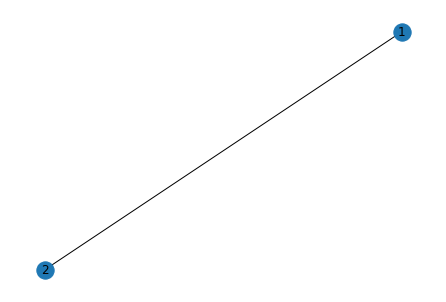

In [ ]:
import networkx as nx
nG=nx.Graph()
nG.add_node(1)
nG.add_node(2)
nG.add_edge(1,2)
print("Nodes:",list(nG.nodes))
print("Edges:",list(nG.edges))
print(nG.is_directed())
nx.draw_circular(nG,with_labels=True)

Nodes: [1, 2]
Edges: [(1, 2)]
True


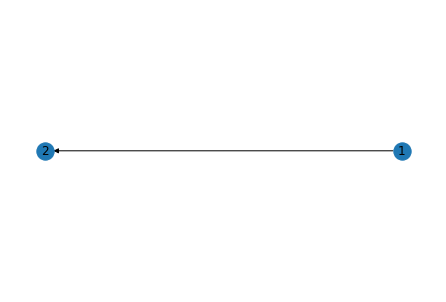

In [ ]:
import networkx as nx
nG=nx.DiGraph()
nG.add_edge(1,2)
print("Nodes:",list(nG.nodes))
print("Edges:",list(nG.edges))
print(nG.is_directed())
nx.draw_circular(nG,with_labels=True)

In [ ]:
import csv
i=0
with open('/content/drive/MyDrive/web-Stanford.txt', 'r') as file:
    reader = csv.reader(file,delimiter = '\t')
    for row in reader:
        print(row)
        i+=1
        if i>4:
          break

['# Directed graph (each unordered pair of nodes is saved once): web-Stanford.txt ']
['# Stanford web graph from 2002']
['# Nodes: 281903 Edges: 2312497']
['# FromNodeId', 'ToNodeId']
['1', '6548']


In [ ]:
import networkx as nx
import csv
i=0

pageG=nx.DiGraph()

with open('/content/drive/MyDrive/web-Stanford.txt', 'r') as file:
    reader = csv.reader(file,delimiter = '\t')
    for row in reader:
      if i>4:
        pageG.add_edge(row[0],row[1])
      #if i>1000:
      #  break
      i+=1

In [ ]:
pageG.is_directed()

True

In [ ]:
print("Nodes:",len(list(pageG.nodes)))
print("Edges:",len(list(pageG.edges)))

Nodes: 281903
Edges: 2312496


In [40]:
def pagerank(G, alpha=0.85, personalization=None,
			max_iter=100, tol=1.0e-6, nstart=None, weight='weight',
			dangling=None):
  	
	if len(G) == 0:
	  return {}
	if not G.is_directed():
		D = G.to_directed()
	else:
		D = G

	# Create a copy in (right) stochastic form
	W = nx.stochastic_graph(D, weight=weight) #A right-stochastic graph is a weighted digraph in which for each node, the sum of the weights of all the out-edges of that node is 1
	N = W.number_of_nodes()

	# Choose fixed starting vector if not given
	if nstart is None:
		x = dict.fromkeys(W, 1.0 / N)
	else:
		# Normalized nstart vector
		s = float(sum(nstart.values()))
		x = dict((k, v / s) for k, v in nstart.items())

	if personalization is None:

		# Assign uniform personalization vector if not given
		p = dict.fromkeys(W, 1.0 / N)
	else:
		missing = set(G) - set(personalization)
		if missing:
			raise NetworkXError('Personalization dictionary '
								'must have a value for every node. '
								'Missing nodes %s' % missing)
		s = float(sum(personalization.values()))
		p = dict((k, v / s) for k, v in personalization.items())

	if dangling is None:

		# Use personalization vector if dangling vector not specified
		dangling_weights = p
	else:
		missing = set(G) - set(dangling)
		if missing:
			raise NetworkXError('Dangling node dictionary '
								'must have a value for every node. '
								'Missing nodes %s' % missing)
		s = float(sum(dangling.values()))
		dangling_weights = dict((k, v/s) for k, v in dangling.items())
	dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]

	# power iteration: make up to max_iter iterations
	for _ in range(max_iter):
		xlast = x
		x = dict.fromkeys(xlast.keys(), 0)
		danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
		for n in x:

			# this matrix multiply looks odd because it is
			# doing a left multiply x^T=xlast^T*W
			for nbr in W[n]:
				x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
			
			x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]


		# check convergence, l1 norm
		err = sum([abs(x[n] - xlast[n]) for n in x])
		if err < N*tol:
			return x
	raise NetworkXError('pagerank: power iteration failed to converge '  'in %d iterations.' % max_iter)

In [41]:
pr=nx.pagerank(pageG,0.5)

In [42]:
import operator
sorted_d = dict( sorted(pr.items(), key=operator.itemgetter(1),reverse=True))
sorted_d

{'226411': 0.00918893329549712,
 '241454': 0.00672366095565256,
 '89073': 0.0064866444127989475,
 '67756': 0.003650422078568506,
 '69358': 0.0033769724639487785,
 '186750': 0.002771901241071356,
 '225872': 0.0027693944545717224,
 '231363': 0.002714677953917289,
 '134832': 0.0025239606121161364,
 '234704': 0.0023929250180366483,
 '105607': 0.0020248873410027074,
 '38342': 0.0018845855293060042,
 '167295': 0.0018505692069031153,
 '198090': 0.0016838393413581584,
 '81435': 0.0016776832511666217,
 '214128': 0.0016774558783924842,
 '34573': 0.0016390493879623283,
 '93778': 0.0015859170115298633,
 '245659': 0.0015814310183366194,
 '136821': 0.0015534382307778253,
 '68889': 0.001543832416304476,
 '119479': 0.0015117085324740682,
 '95163': 0.0014065549381793686,
 '251796': 0.0014065549381793686,
 '272442': 0.0014065549381793686,
 '158568': 0.0011736670932553203,
 '101161': 0.0011649378652433457,
 '258348': 0.0009758417217183442,
 '60210': 0.0009689871013393683,
 '117152': 0.0008796454506242434

In [43]:
import numpy as np
np.sum(list(sorted_d.values()))

1.0000000000000029